# K means clustering

## 1. Introduction

K Means Clustering one of the most popular unsupervised machine learning algorithms for cluster analysis. To get a better sense of what k means clustering does, it is useful to make a distinction between *hierarchical* and *nonhierarchical* clustering algorithms:

- In cluster analysis, an **agglomerative hierarchical** algorithm starts with *n* clusters (where *n* is the number of observations, so each observation is a cluster), then combines the two most similar clusters, combines the next two most similar clusters, and so on. A **divisive** hierarchical algorithm does the exact opposite, going from 1 to *n* clusters.

- A **nonhierarchical** algorithm chooses *k* initial clusters and reassigns observations until no improvement can be obtained. How initial clusters and reassignemnts are done depends on the specific type of algorithm.

As you might have guessed, k means clustering belongs to the second class of algorithms. As you are basically trying to group data points together, there is no training set versus test set partitioning which needs to be made. One thing about k means clustering that sometimes makes it challenging is that the number *k* needs to be decided upon before you start running the algorithm.

## 2. How it works

The k means clustering algorithm is an iterative algorithm that rearches for a pre-determined number of clusters within an unlabeled dataset, and basically works as follows:

- select k initial seeds
- assign each observation to the clusted to which it is "closest" 
- recompute the cluster centroids
- reassign the observations to one of the clusters according to some rule
- stop if there is no reallocation.

Two assumptions are of main importance for the k means clustering algorithm.

1. To compute the "cluster center", you calculate the (arithmetic) mean of all the points belonging to the cluster.
2. Reassigning works in a way that each point is closer to its own cluster center than to other cluster centers.

## 3. k means clustering in Python

Like many other clustering algorithms, k means clustering is implemented in scikit-learn: `sklearn.cluster.KMeans`. Scikit learn has excellent data sets generators. one of them is `make_blobs`, let's generate a data set with 7 blobs 

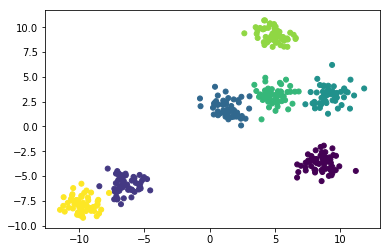

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


X, y = make_blobs(n_samples=400, n_features=2, centers=7, cluster_std=0.8,  random_state = 12345)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 25);

In this image, you can see the clusters as they are generated. Let's now see if the k means clustering algorithm can pick these clusters back up.

In [2]:
k_means = KMeans(n_clusters = 7)
k_means.fit(X)
y_hat = k_means.predict(X)

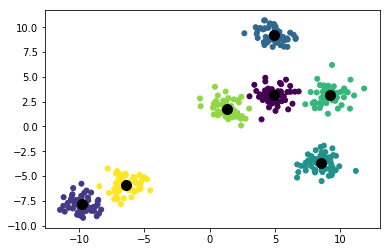

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

As you can see, the algorithm is pretty good at identifying the clusters. Do keep in mind that for a real data set, you will not be able to evaluate the method as such, as we don't know a priori what the clusters should be. This is the nature of unsupervised learning. The Scikit learn documentation does suggest two methods to evaluate your clusters when the "ground truth" is not known: the Silhouette coefficient and the Calinski-Harabaz Index. We'll talk about them later, but first, let's look at the Scikit learn options when using the KMeans function.

We'll discuss two important parameters which we haven't specified before: `init` and `algorithm`.

`init` specifies the method for initialization:

- `k-means++` is the default method, this method selects initial cluster centers in a smart way in order to pursue fast convergence.
- `random`: choose k random observations for the initial centroids.
- `ndarray`: you can pass this argument and provide initial centers.

`algorithm` specifies the algorithm used:

- If `full` is specified, a full EM-style algorithm is performed. EM is short for "Expectation Maximization" and its name is derived from the nature of the algorithm, where in each iteration an E-step (in the context of K-means clustering, the points are assigned to the nearest center) and an M-step (the cluster mean is updated based on the elements of the cluster) is created. 
- The EM algorithm can be slow. The `elkan` variation is more efficient, but not available for sparse data.
- The default is `auto`, and automatically selects `full` for sparse data and `elkan` for dense data. 




## 4. Evaluating k means when labels are not known.

### 4.1 The silhouette coefficient

If the actual cluster labels are unknown, the model itself must be used for evaluation. When calculating the Silhouette Coefficient, a higher score means that you ended up with a model with better defined clusters. Two scores are used to generate the silhouette coefficient:

- **a** is the average distance between one data sample and all other points in the same cluster
- **b**: The average distance between one data sample and all other points in the next nearest cluster.

The silhouette coefficient is then given by:

$$ s = \dfrac{(b-a)}{max(b-a)} $$

applied to our model before, we can use 

In [66]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = k_means.labels_

metrics.silhouette_score(X, labels, metric='euclidean')

0.6805359856413705

Obviously, this number isn't very informative by itself, it only really is informative when you compare it to another coefficient. Let's look at the coefficient when we would have fitted a model with only 6 clusters.

In [69]:
k_means_6 = KMeans(n_clusters = 6)
k_means_6.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
labels_6 = k_means_6.labels_
metrics.silhouette_score(X, labels_6, metric='euclidean')

0.661640578627616

Seems like 7 clusters generated a better result according to the silhouette coefficient!

### 4.2 Calinski-Harabaz Index

Very similarly to the silhouette coefficient, the Calinski-Harabaz index (`sklearn.metrics.calinski_harabaz_score`) can be used to evaluate the model when class labels are not known a priori. Again, a higher CH score means that the model has better defined clusters.

When you have k clusters, the score s is a ratio of the between-cluster dispersion, and the within-cluster dispersion.

$$ s(k) = \dfrac{Tr(B_k)}{Tr(W_k)}\times \dfrac{N-k}{k-1}$$

Here, the between group dispersion matrix is $B_k$ and the withing dispersion matrix is $W_k$:

$$W_k = \sum^k_{q=1} \sum_{x\in C_q} (x - c_q)(x-c_q)^T$$
$$B_k = \sum_{q} n_q (c_q - c)(c_q-c)^T$$

where 

- $N$ is the data size
- $C_q$ represents the samples in cluster $q$
- $c_q$ represents the center of cluster $q$
- $c$ the center of $E$
- $n_q$ the number of samples in cluster $q$.

In [72]:
metrics.calinski_harabaz_score(X, labels)  

4057.9994309392187

In [73]:
metrics.calinski_harabaz_score(X, labels_6)  

2696.6914224636153

Also here, the CH index is higher for the model with 7 clusters!

Sources: 
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
http://scikit-learn.org/stable/modules/clustering.html